In [45]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import pandas as pd
import re
import time

date = time.strftime('%Y%m%d', time.localtime(time.time()))

result = []
re = []

def scroll(q):
    body = driver.find_element_by_css_selector('body')
    for i in range(q):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(1)
        

# 웹접속 - 네이버 이미지 접속
# 79.0.3945.36 / chrome version
print("접속중")
driver = webdriver.Chrome(executable_path="./chromedriver.exe")
driver.implicitly_wait(30)

url = 'https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&date={}'.format(date)
driver.get(url)
time.sleep(1)

# scroll(3)
for sun in range(4,10):
    pr = driver.find_elements_by_xpath('//*[@id="wrap"]/table/tbody/tr/td[2]/div/div[{}]'.format(sun))
    for p in pr:
        result.append(p.find_elements_by_tag_name('a'))
    print(result)

    for i,q in enumerate(result):
        for e in q:
            re.append(e.get_attribute('href'))

driver.close()
# 중복된 사이트제거.
http = list(set(re))
len(http)

접속중
[[<selenium.webdriver.remote.webelement.WebElement (session="22afc7805fc3517b0389bc1bf995f313", element="d7cd9787-ce81-49f2-b063-b1d921729bb1")>, <selenium.webdriver.remote.webelement.WebElement (session="22afc7805fc3517b0389bc1bf995f313", element="66d4fa31-51e9-4bfa-999b-df6cd2dea62d")>, <selenium.webdriver.remote.webelement.WebElement (session="22afc7805fc3517b0389bc1bf995f313", element="1b4fc41c-d7b0-4713-b330-a502c545505d")>, <selenium.webdriver.remote.webelement.WebElement (session="22afc7805fc3517b0389bc1bf995f313", element="5cfa5a05-7657-42ba-bdf6-75031839a238")>, <selenium.webdriver.remote.webelement.WebElement (session="22afc7805fc3517b0389bc1bf995f313", element="e92437a0-0101-499d-ac38-339650f4ab15")>, <selenium.webdriver.remote.webelement.WebElement (session="22afc7805fc3517b0389bc1bf995f313", element="ae99fbfc-09c1-434a-8c85-9993c2dc178e")>, <selenium.webdriver.remote.webelement.WebElement (session="22afc7805fc3517b0389bc1bf995f313", element="9eaa723f-9305-4c7c-b14d-9f2

In [54]:
len(re)

147

36

In [56]:
http

['https://news.naver.com/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=025&aid=0002980407&date=20200303&type=1&rankingSectionId=103&rankingSeq=1',
 'https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&sectionId=104&date=20200303',
 'https://news.naver.com/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=052&aid=0001408964&date=20200303&type=2&rankingSectionId=104&rankingSeq=4',
 'https://news.naver.com/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=011&aid=0003703436&date=20200303&type=1&rankingSectionId=105&rankingSeq=1',
 'https://news.naver.com/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=015&aid=0004299805&date=20200303&type=1&rankingSectionId=105&rankingSeq=2',
 'https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&sectionId=102&date=20200303',
 'https://news.naver.com/main/ranking/read.nhn?mid=etc&sid1=111&rankingType=popular_day&oid=108&aid=0002846463&dat

# 네이버 헤드라인 가져오는소스
httz = 'https://news.naver.com'
res = requests.get(httz)
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.select('#today_main_news > div.hdline_news > ul')
body = body[0].find_all('a')
body

for i in range(len(body)):
    t = body[i].get('href')
    http.append(t)

In [58]:

# 헤드라인중 링크소스만 뽑아서 다시 들어가서 텍스트만 뽑아옴
for i in range(len(http)):
    res = requests.get(http[i])
    soup = BeautifulSoup(res.content, 'html.parser')
    body = soup.select('._article_body_contents')
    for t in body:
        text = t.get_text() # for p in body.find_all('div'))
        text2.insert(-1,text)



In [59]:
# 사전만들기
from ckonlpy.tag import Twitter
t = Twitter()
t.add_dictionary(['트와이스', 'kf94','KF94','Kf94','kF94','타임라인','확진자','예방수칙','코로나19','corona19','Corona19',
                 '개소리','판매','제품','쿠팡','kf94마스크','KF94마스크','Kf94마스크','kF94마스크',
                 '우한폐렴','신종코로나','신종코로나바이러스','coronavirus','Coronavirus','사재기',
                 '복지부장관', '바이러스', '피해복구', '이만희', '문재인', '이재갑','한림대',
                 '감염내과', '교수님', '정치인', '입국금지','대변인', '청와대','문대통령','황기자'], 'Noun')

C:\Users\82105\Anaconda3\envs\Testing\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [60]:
import nltk
import numpy as np
tokens_ko = []

for i in range(len(text2)):
    tokens_ko.append(t.nouns(text2[i]))

In [61]:
final = []
for _,q in enumerate(tokens_ko):
    for i in range(len(q)):
        final.insert(-1,q[i])

In [62]:
ko = nltk.Text(final, name="첫번째")
data = ko.vocab().most_common(1000)

In [63]:
import time
date = time.strftime('%Y%m%d', time.localtime(time.time()))

In [65]:
# 텍스트파일에 댓글 저장하기
file = open('text/naver/naver{}.txt'.format(date),'w',encoding='utf-8')

for review in text2:
    file.write(review+'\n')

file.close()

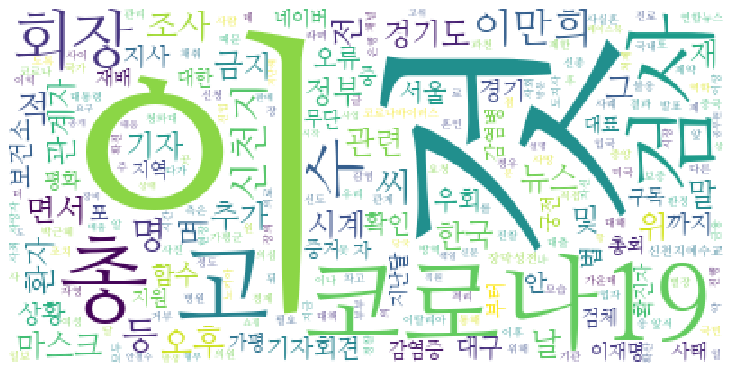

In [67]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Twitter
import numpy as np
from PIL import Image

tmp_data = dict(data)

wordcloud = WordCloud( font_path = '/Library/Fonts/NanumMyeongjo.ttf',
                       background_color='white',max_words=230).generate_from_frequencies(tmp_data)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("img/naver/naver_{}.png".format(date),bbox_inces='tight',dpi=400,pad_inches=0)
plt.show()